Baseline k-NN Accuracy (original 64 dims): 0.9833333333333333
PCA k-NN Accuracy: 0.6111111111111112
Kernel PCA (RBF) k-NN Accuracy: 0.32222222222222224
LLE k-NN Accuracy: 0.8861111111111111


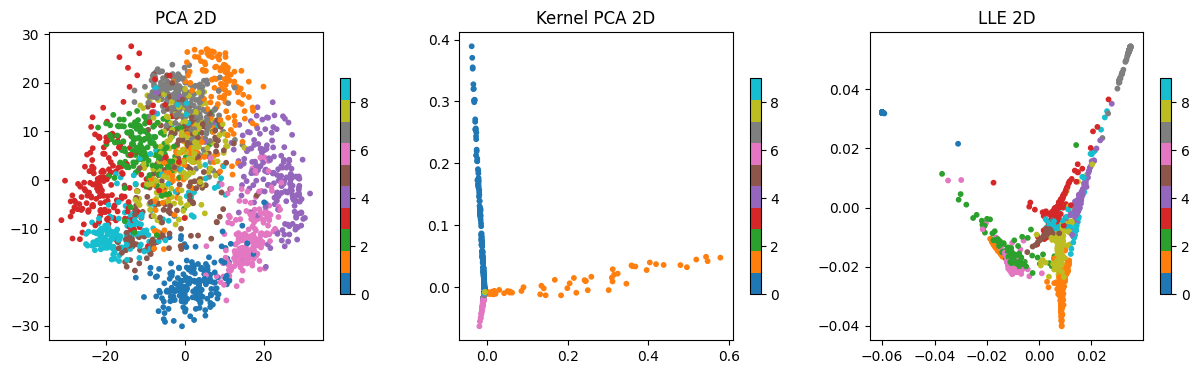

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline kNN accuracy without dimensionality reduction
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, knn.predict(X_test))
print("Baseline k-NN Accuracy (original 64 dims):", baseline_acc)

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ---------- Kernel PCA ----------
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
X_kpca = kpca.fit_transform(X)

# ---------- LLE ----------
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)

# ---------- Evaluate kNN after DR ----------
def eval_reduced_data(X_reduced, name):
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        X_reduced, y, test_size=0.2, random_state=42
    )
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_r, y_train_r)
    acc = accuracy_score(y_test_r, knn.predict(X_test_r))
    print(f"{name} k-NN Accuracy:", acc)

eval_reduced_data(X_pca, "PCA")
eval_reduced_data(X_kpca, "Kernel PCA (RBF)")
eval_reduced_data(X_lle, "LLE")

# ---------- Plotting ----------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
titles = ["PCA 2D", "Kernel PCA 2D", "LLE 2D"]
datasets = [X_pca, X_kpca, X_lle]

for ax, data, title in zip(axes, datasets, titles):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap="tab10", s=10)
    ax.set_title(title)
    plt.colorbar(scatter, ax=ax, shrink=0.7)

plt.show()

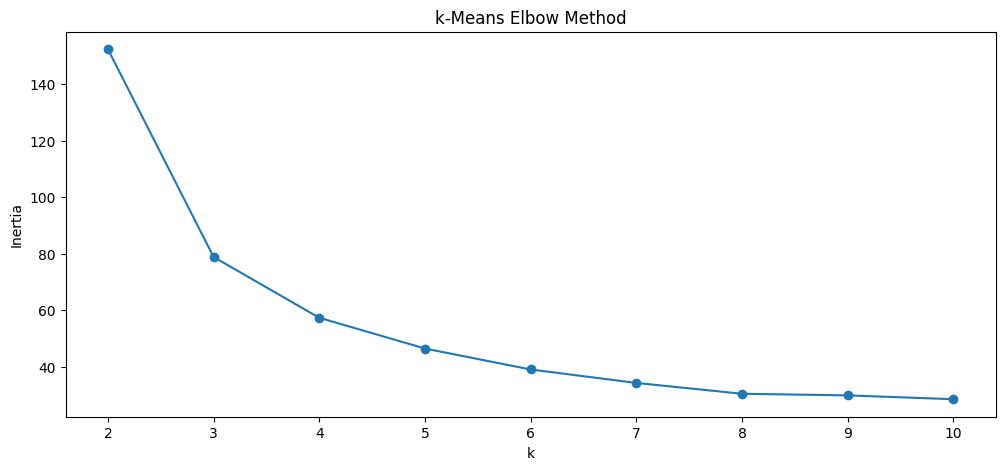

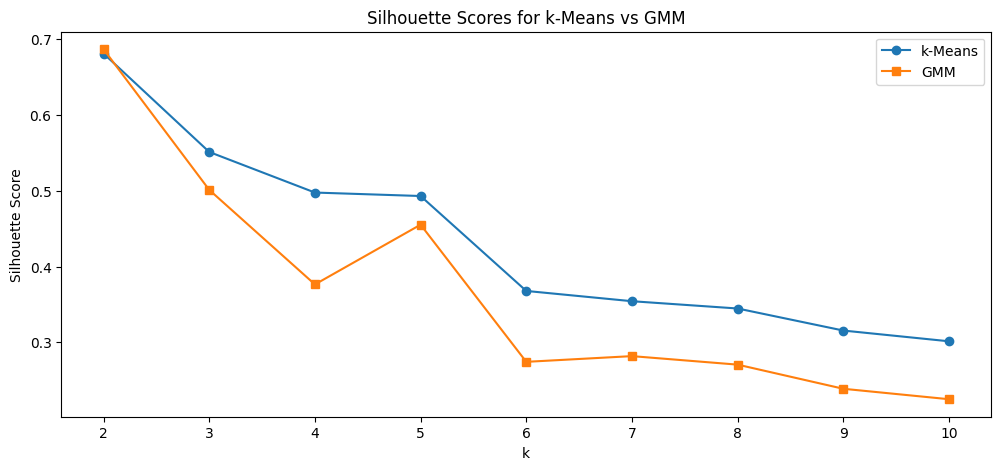

Best k for k-Means: 2
Best k for GMM: 2

--- Final Model Evaluation ---
k-Means Silhouette: 0.6810461692117462
GMM Silhouette: 0.6867350732769777
k-Means ARI: 0.5399218294207123
GMM ARI: 0.5681159420289855


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load dataset
data = load_iris()
X, y_true = data.data, data.target

# ---------------- Choosing k ----------------
K_RANGE = range(2, 11)
kmeans_inertia, kmeans_sil, gmm_sil = [], [], []

for k in K_RANGE:
    # k-Means
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_labels = km.labels_
    kmeans_inertia.append(km.inertia_)
    kmeans_sil.append(silhouette_score(X, km_labels))

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X)
    gmm_labels = gmm.predict(X)
    gmm_sil.append(silhouette_score(X, gmm_labels))

# ---------------- Elbow Plot ----------------
plt.figure(figsize=(12, 5))
plt.plot(K_RANGE, kmeans_inertia, marker='o')
plt.title("k-Means Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# ---------------- Silhouette Comparison ----------------
plt.figure(figsize=(12, 5))
plt.plot(K_RANGE, kmeans_sil, marker='o', label="k-Means")
plt.plot(K_RANGE, gmm_sil, marker='s', label="GMM")
plt.title("Silhouette Scores for k-Means vs GMM")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

# Best k
best_k_kmeans = K_RANGE[np.argmax(kmeans_sil)]
best_k_gmm = K_RANGE[np.argmax(gmm_sil)]

print("Best k for k-Means:", best_k_kmeans)
print("Best k for GMM:", best_k_gmm)

# ---------------- Final Models ----------------
kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42).fit(X)
gmm_final = GaussianMixture(n_components=best_k_gmm, random_state=42).fit(X)

kmeans_labels = kmeans_final.labels_
gmm_labels = gmm_final.predict(X)

# ---------------- Evaluation ----------------
print("\n--- Final Model Evaluation ---")
print("k-Means Silhouette:", silhouette_score(X, kmeans_labels))
print("GMM Silhouette:", silhouette_score(X, gmm_labels))
print("k-Means ARI:", adjusted_rand_score(y_true, kmeans_labels))
print("GMM ARI:", adjusted_rand_score(y_true, gmm_labels))
